In [7]:
#libraries

import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Input
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from keras.layers import Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
import cv2
from sklearn.model_selection import train_test_split
import os
import pandas as pd
import random
from tensorflow.keras.preprocessing.image import ImageDataGenerator

print('done')

done


In [9]:
################# Parameters #####################

path = "C:/Users/ramachandran/Desktop/project/Train"  # Folder containing subfolders for each class (0 to 42)
labelFile = 'C:/Users/ramachandran/Desktop/project/labels.csv'  # File with class names and mappings
batch_size_val = 50  # how many to process together
steps_per_epoch_val = 2000
epochs_val = 30
imageDimesions = (32, 32, 3)
testRatio = 0.2    # 20% of the images for testing
validationRatio = 0.2  # 20% of the remaining 80% for validation

print('done')

done


In [11]:
############################### Importing of the Images
count = 0
images = []
classNo = []
myList = os.listdir(path)
print("Total Classes Detected:", len(myList))
noOfClasses = len(myList)
print("Importing Classes.....")
for x in range(0, len(myList)):
    myPicList = os.listdir(path + "/" + str(count))
    for y in myPicList:
        curImg = cv2.imread(os.path.join(path, str(count), y))  # Updated to ensure correct path usage
        curImg = cv2.resize(curImg, (32, 32))  # Ensure all images are resized to 32x32
        images.append(curImg)
        classNo.append(count)
    print(count, end=" ")
    count += 1
print(" ")
images = np.array(images)
classNo = np.array(classNo)

print('done')


Total Classes Detected: 43
Importing Classes.....
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42  
done


In [13]:
############################### Split Data
X_train, X_test, y_train, y_test = train_test_split(images, classNo, test_size=testRatio)
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=validationRatio)

# X_train = ARRAY OF IMAGES TO TRAIN
# y_train = CORRESPONDING CLASS ID

steps_per_epoch_val = len(X_train) // batch_size_val
validation_steps = len(X_test) // batch_size_val

print('done')

done


In [15]:
############################### TO CHECK IF NUMBER OF IMAGES MATCHES TO NUMBER OF LABELS FOR EACH DATASET
print("Data Shapes")
print("Train", end=""); print(X_train.shape, y_train.shape)
print("Validation", end=""); print(X_validation.shape, y_validation.shape)
print("Test", end=""); print(X_test.shape, y_test.shape)

print('done')

# Assertions to check the integrity of data
assert(X_train.shape[0] == y_train.shape[0]), "The number of images does not match the number of labels in training set"
assert(X_validation.shape[0] == y_validation.shape[0]), "The number of images does not match the number of labels in validation set"
assert(X_test.shape[0] == y_test.shape[0]), "The number of images does not match the number of labels in test set"
assert(X_train.shape[1:] == imageDimesions), "The dimensions of the Training images are wrong"
assert(X_validation.shape[1:] == imageDimesions), "The dimensions of the Validation images are wrong"
assert(X_test.shape[1:] == imageDimesions), "The dimensions of the Test images are wrong"

print('done')

Data Shapes
Train(25093, 32, 32, 3) (25093,)
Validation(6274, 32, 32, 3) (6274,)
Test(7842, 32, 32, 3) (7842,)
done
done


In [17]:
############################### READ CSV FILE
data = pd.read_csv(labelFile)
print("Data shape ", data.shape, type(data))

Data shape  (43, 2) <class 'pandas.core.frame.DataFrame'>


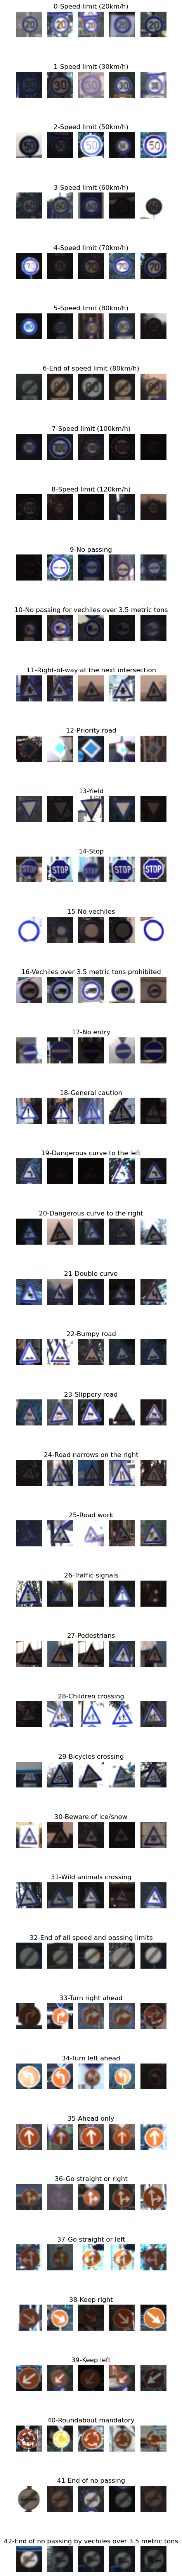

done


In [19]:
############################### DISPLAY SOME SAMPLE IMAGES OF ALL THE CLASSES
num_of_samples = []
cols = 5
num_classes = noOfClasses
fig, axs = plt.subplots(nrows=num_classes, ncols=cols, figsize=(5, num_classes * 2))  # Adjust figsize based on num_classes
fig.subplots_adjust(hspace=0.5, wspace=0.2)  # Adjust spacing between images

for i in range(cols):
    for j, row in data.iterrows():
        x_selected = X_train[y_train == j]
        axs[j][i].imshow(x_selected[random.randint(0, len(x_selected) - 1), :, :], cmap=plt.get_cmap("gray"))
        axs[j][i].axis("off")
        if i == 2:
            axs[j][i].set_title(str(j) + "-" + row["Name"])
            num_of_samples.append(len(x_selected))

plt.show()  # This will show the plot with adjusted spacing

print('done')


[134, 1453, 1429, 871, 1272, 1191, 263, 941, 937, 931, 1288, 825, 1356, 1391, 489, 395, 258, 716, 780, 127, 226, 211, 241, 316, 180, 945, 402, 155, 339, 170, 282, 520, 157, 436, 288, 757, 249, 132, 1313, 198, 223, 155, 151]


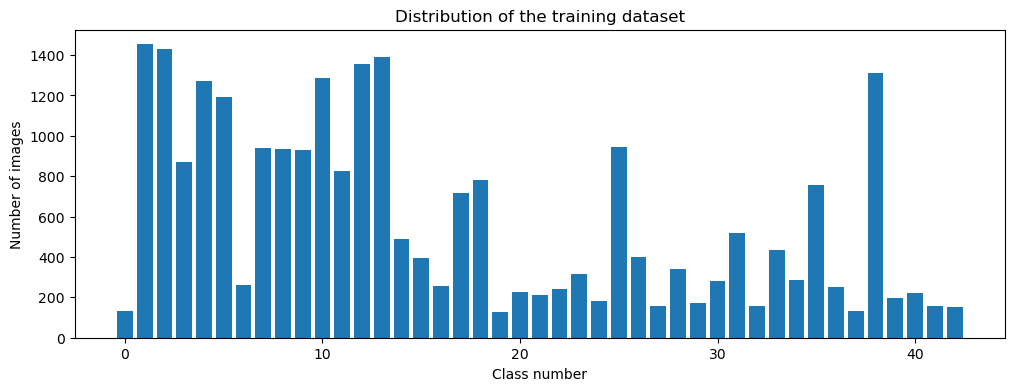

In [21]:
############################### DISPLAY A BAR CHART SHOWING NO OF SAMPLES FOR EACH CATEGORY
print(num_of_samples)
plt.figure(figsize=(12, 4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of the training dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")
plt.show()


In [23]:
############################### PREPROCESSING THE IMAGES
def grayscale(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return img

def equalize(img):
    img = cv2.equalizeHist(img)
    return img

def preprocessing(img):
    img = grayscale(img)     # Convert to grayscale
    img = equalize(img)      # Standardize lighting
    img = img / 255          # Normalize to [0, 1]
    return img

print('done')

done


In [25]:
# Preprocess all images
X_train = np.array(list(map(preprocessing, X_train)))
X_validation = np.array(list(map(preprocessing, X_validation)))
X_test = np.array(list(map(preprocessing, X_test)))

cv2.imshow("GrayScale Image Sample", X_train[random.randint(0, len(X_train) - 1)])

print('done')


done


In [27]:
############################### ADD A DEPTH OF 1
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
X_validation = X_validation.reshape(X_validation.shape[0], X_validation.shape[1], X_validation.shape[2], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)

print('done')


done


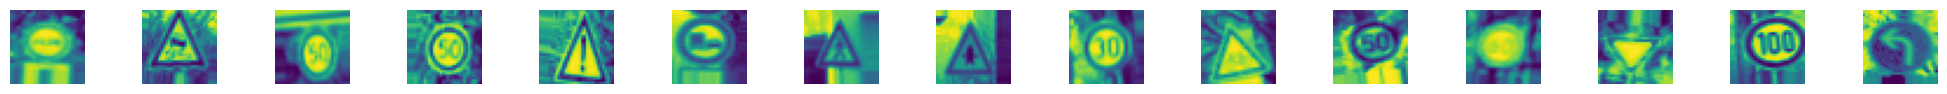

done


In [29]:
############################### IMAGE AUGMENTATION
dataGen = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, zoom_range=0.2,
                             shear_range=0.1, rotation_range=10)
dataGen.fit(X_train)
batches = dataGen.flow(X_train, y_train, batch_size=20)
X_batch, y_batch = next(batches)

# Display augmented image samples
fig, axs = plt.subplots(1, 15, figsize=(20, 5))
fig.tight_layout()

for i in range(15):
    axs[i].imshow(X_batch[i].reshape(imageDimesions[0], imageDimesions[1]))
    axs[i].axis('off')
plt.show()

y_train = to_categorical(y_train, noOfClasses)
y_validation = to_categorical(y_validation, noOfClasses)
y_test = to_categorical(y_test, noOfClasses)

print('done')

In [31]:
############################### Define the Model

def myModel():
    model = Sequential()
    
    # Use Input layer explicitly
    model.add(Input(shape=(32, 32, 1)))  # Instead of passing input_shape to Conv2D
    
    model.add(Conv2D(60, (5, 5), activation='relu'))
    model.add(Conv2D(60, (5, 5), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Conv2D(30, (5, 5), activation='relu'))
    model.add(Conv2D(30, (5, 5), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Dropout(0.5))  # Add Dropout for regularization
    model.add(Flatten())
    
    model.add(Dense(500, activation='relu'))
    model.add(Dropout(0.5))
    
    model.add(Dense(noOfClasses, activation='softmax'))
    
    # Compile the model
    model.compile(optimizer=Adam(learning_rate=0.001),  # Use learning_rate, not lr
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    
    return model

print('done')

done


In [33]:
############################### TRAINING THE MODEL
model = myModel()

# Print model summary
print(model.summary())

# Training with fit() (fit_generator is deprecated)
history = model.fit(dataGen.flow(X_train, y_train, batch_size=batch_size_val),
                    steps_per_epoch=steps_per_epoch_val, epochs=epochs_val,
                    validation_data=(X_validation, y_validation),
                    shuffle=True)

print('Training done')

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 60)     │         1,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 24, 24, 60)     │        90,060 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 12, 12, 60)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 30)       │        45,030 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 4, 4, 30)       │        22,530 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 2, 2, 30)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2, 2, 30)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 500)            │        60,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 500)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 43)             │        21,543 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 241,223 (942.28 KB)

 Trainable params: 241,223 (942.28 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/30


C:\Users\ramachandran\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


501/501 ━━━━━━━━━━━━━━━━━━━━ 99s 189ms/step - accuracy: 0.1041 - loss: 3.2972 - val_accuracy: 0.6498 - val_loss: 1.1469
Epoch 2/30
  1/501 ━━━━━━━━━━━━━━━━━━━━ 1:15 151ms/step - accuracy: 0.4800 - loss: 1.7794

C:\Users\ramachandran\anaconda3\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


501/501 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.4800 - loss: 1.7794 - val_accuracy: 0.6344 - val_loss: 1.1650
Epoch 3/30
501/501 ━━━━━━━━━━━━━━━━━━━━ 98s 196ms/step - accuracy: 0.5176 - loss: 1.5546 - val_accuracy: 0.8516 - val_loss: 0.5084
Epoch 4/30
501/501 ━━━━━━━━━━━━━━━━━━━━ 8s 15ms/step - accuracy: 0.5800 - loss: 1.3215 - val_accuracy: 0.8553 - val_loss: 0.4958
Epoch 5/30
501/501 ━━━━━━━━━━━━━━━━━━━━ 106s 212ms/step - accuracy: 0.6839 - loss: 1.0012 - val_accuracy: 0.9160 - val_loss: 0.3088
Epoch 6/30
501/501 ━━━━━━━━━━━━━━━━━━━━ 8s 15ms/step - accuracy: 0.8200 - loss: 0.6545 - val_accuracy: 0.9157 - val_loss: 0.3087
Epoch 7/30
501/501 ━━━━━━━━━━━━━━━━━━━━ 108s 215ms/step - accuracy: 0.7539 - loss: 0.7746 - val_accuracy: 0.9399 - val_loss: 0.2202
Epoch 8/30
501/501 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.8200 - loss: 0.4899 - val_accuracy: 0.9388 - val_loss: 0.2242
Epoch 9/30
501/501 ━━━━━━━━━━━━━━━━━━━━ 107s 213ms/step - accuracy: 0.7933 - loss: 0.6532 - val_accu

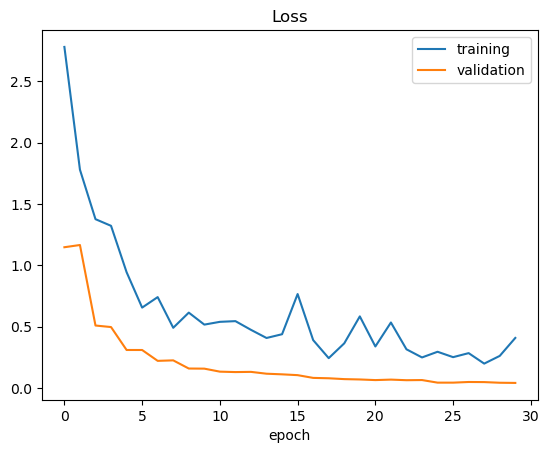

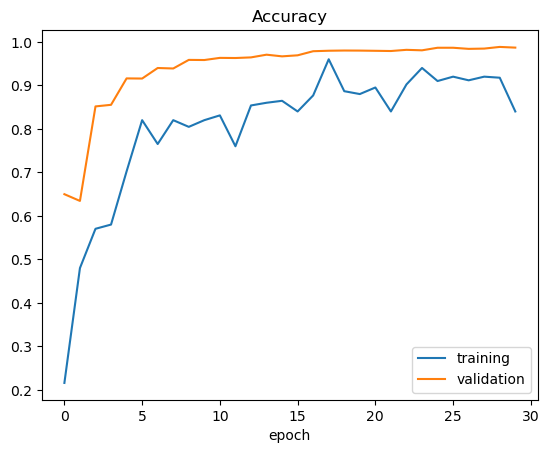

In [35]:
############################### PLOTTING TRAINING HISTORY
plt.figure(1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training', 'validation'])
plt.title('Loss')
plt.xlabel('epoch')

plt.figure(2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'])
plt.title('Accuracy')
plt.xlabel('epoch')
plt.show()


In [37]:
############################### EVALUATE THE MODEL
score = model.evaluate(X_test, y_test, verbose=0)
print('Test Score:', score[0])
print('Test Accuracy:', score[1])

Test Score: 0.04009807109832764
Test Accuracy: 0.98916095495224


In [39]:
############################### SAVE THE MODEL
model_path = 'trained_model.h5'
model.save(model_path)